In [1]:
from ipynb.fs.full.data_cleaning import df, serviceDf, zipCodes
import pandas as pd
import numpy as np
from numpy import NaN
import matplotlib
import matplotlib.pyplot as plt

df.sample(3)

,Segments,Services,Type,Service,Hires,Price,Price Type,Rating,Zip Code,Capital City,State,Abbreviation,Implied Revenue
182426,Events,Audio Recording,Peripheral,Keef Keyz Productions LLC.,30.00,50.00,hour,5.00,19103,Philadelphia,Pennsylvania,PA,"1,500.00"
218304,Events,Wedding Officiant,Main,Precious McGill,NaN,250.00,,5.00,90013,Los Angeles,California,CA,NaN
92180,Wellness,Alternative Healing,Peripheral,Synergy Bioenergetic Wellness,NaN,100.00,session,4.50,2201,Boston,Massachusetts,MA,NaN


In [2]:
df.shape

(45513, 13)

**General quetions:**
1. Which segments is Thumbtack focusing on? Or is Thumbtack consistent in all segments & services?
2. Does the demand & supply in services change from a region to another?
3. Which segments are doing better or worse?
4. Is Thumbtack offering this many services because they have a low # hires/# sellers rate?
5. Are there any segments or services that showcase more uncaptured potential?
6. What types of sellers are the most successful? Individuals or business? Does it depend on the type of service and/or region?

# Which segments is Thumbtack focusing on?

## Count by Segment

We can first see a basic count of services for each segment.

In [3]:
# See ranking by count
segmentCount = df.groupby("Segments")["Segments"].count()
dfSegmentCount = segmentCount.to_frame(name="Count").reset_index()
dfSegmentCount["Contribution"] = dfSegmentCount["Count"] / dfSegmentCount["Count"].sum()
dfSegmentCount.sort_values(by="Count", ascending=False)

,Segments,Count,Contribution
2,Home Improvement,22213,0.49
1,Events,13027,0.29
0,Business,4371,0.10
5,Wellness,2655,0.06
3,Lessons,2362,0.05
4,Pets,885,0.02


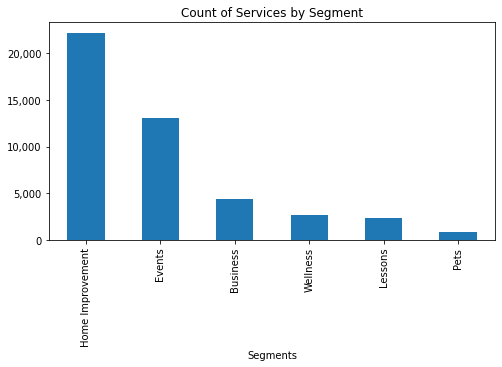

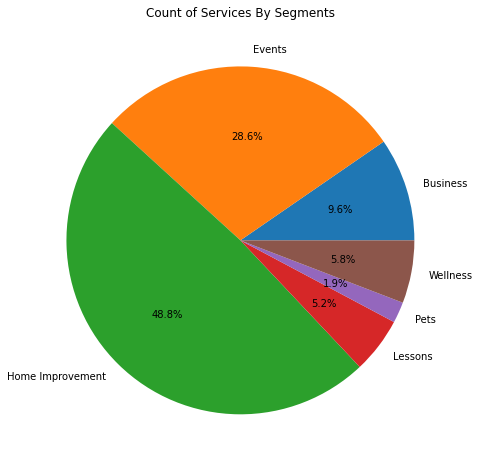

In [4]:
segmentCount.sort_values(ascending=False).plot.bar(
    title="Count of Services by Segment", figsize=(8, 4)
)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(["{:,.0f}".format(x) for x in current_values])
plt.show()

segmentCount.plot.pie(
    autopct="%.1f%%",
    title="Count of Services By Segments",
    y="Count",
    ylabel="",
    figsize=(8, 8),
)
plt.show()

## Count by Services

This is to see the counts for specific services like DJ, massage therapy, etc.

In [5]:
# See ranking by count
servicesCount = df.groupby("Services")["Services"].count()
dfServicesCount = servicesCount.to_frame(name="Count").reset_index()
dfServicesCount["Contribution"] = (
    dfServicesCount["Count"] / dfServicesCount["Count"].sum()
)
dfServicesCount = pd.merge(
    dfServicesCount, serviceDf[["Services", "Segments"]], on="Services"
)
dfServicesCount = dfServicesCount[["Segments", "Services", "Count", "Contribution"]]
dfServicesCount.sort_values(by="Count", ascending=False)[:19]

,Segments,Services,Count,Contribution
442,Events,Wedding Officiant,749,0.02
325,Home Improvement,Real Estate Agent Services,745,0.02
69,Home Improvement,Commercial Cleaning,724,0.02
3,Business,Accounting,626,0.01
248,Wellness,Massage Therapy,576,0.01
448,Events,Wedding and Event Makeup,561,0.01
261,Business,Notarization,552,0.01
9,Wellness,Alternative Healing,547,0.01
87,Events,DJ,541,0.01
304,Events,Portrait Photography,532,0.01


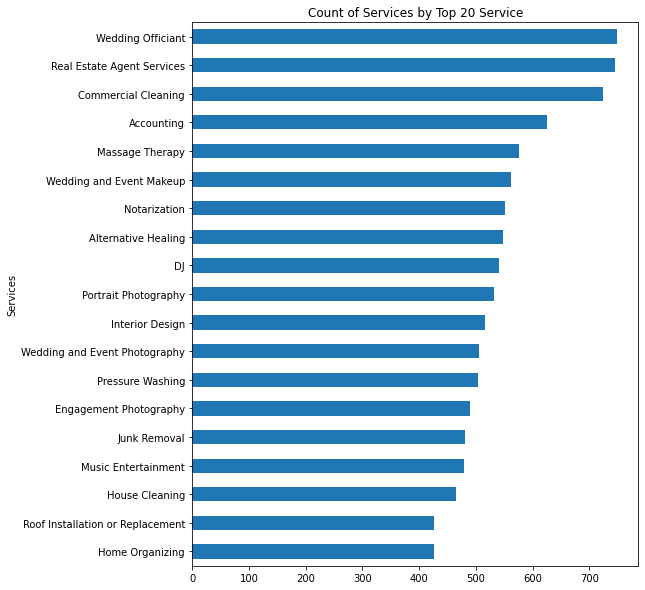

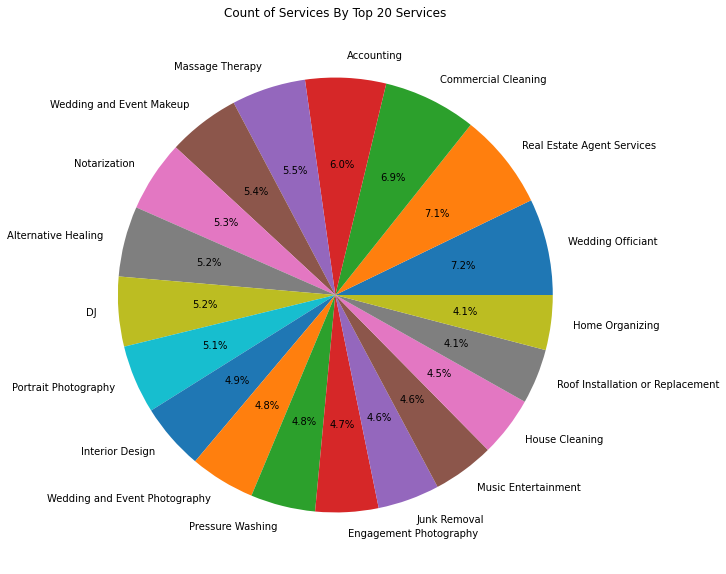

In [6]:
servicesCountChart = servicesCount.sort_values(ascending=False)[:19]
servicesCountChart.sort_values(ascending=True).plot.barh(
    title="Count of Services by Top 20 Service", xlabel="Services", figsize=(8, 10)
)
plt.show()

servicesCountChart.plot.pie(
    autopct="%.1f%%",
    title="Count of Services By Top 20 Services",
    y="Count",
    ylabel="",
    figsize=(10, 10),
)
plt.show()

# Does the demand & supply in services change from a region to another?

Outputs per regional segments & services:
- \# services
- \# hires
- \# hires/#services rate
- List of sellers per region

## Counts of Services by Zip Code

In [7]:
serviceCountZip = df.groupby("Zip Code")["Segments"].count()
dfServiceCountZip = serviceCountZip.to_frame(name="Count").reset_index()

dfServiceCountZip["Zip Code"] = dfServiceCountZip["Zip Code"].astype(str)
zipCodes["Representative ZIP Code"] = zipCodes["Representative ZIP Code"].astype(str)

dfServiceCountZip = pd.merge(
    dfServiceCountZip,
    zipCodes[["Capital City", "State", "Representative ZIP Code"]],
    left_on="Zip Code",
    right_on="Representative ZIP Code",
    how="left",
).drop("Representative ZIP Code", axis=1)

dfServiceCountZip["Contribution"] = (
    dfServiceCountZip["Count"] / dfServiceCountZip["Count"].sum()
)

dfServiceCountZip = dfServiceCountZip[
    ["State", "Capital City", "Zip Code", "Count", "Contribution"]
]
dfServiceCountZip.sort_values(by="Count", ascending=False)[:20]

,State,Capital City,Zip Code,Count,Contribution
79,California,Los Angeles,90013,1842,0.04
18,Georgia,Atlanta,30303,1761,0.04
65,Texas,Dallas,75207,1591,0.03
23,Florida,Miami,33132,1490,0.03
66,Texas,Houston,77002,1434,0.03
69,Colorado,Denver,80202,1348,0.03
73,Arizona,Phoenix,85001,1221,0.03
24,Florida,Tampa,33602,1203,0.03
80,California,San Diego,92101,1180,0.03
50,Illinois,Chicago,60176,1145,0.03


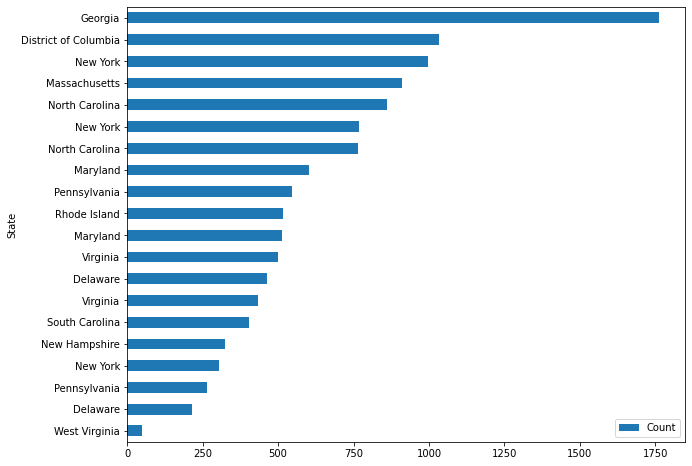

In [8]:
dfServiceCountZip[["State", "Count"]][:20].sort_values(
    by="Count", ascending=True
).plot.barh(x="State", y="Count", figsize=(10,8))
plt.show()

## Zip Code with Highest Count of Events, Wellness, and Lessons

In [9]:
sliceSegments = ["Lessons", "Wellness", "Events"]
dfLifeStyle = df[df["Segments"].isin(sliceSegments)]

dfLifeStyleCountByZipChart = dfLifeStyle.groupby("Capital City")["Segments"].count().sort_values(ascending=False)

dfLifeStyleCountByZip = dfLifeStyleCountByZipChart.to_frame(
    name="Lifestyle Services"
).reset_index()

dfLifeStyleCountByZip["Contribution"] = (
    dfLifeStyleCountByZip["Lifestyle Services"]
    / dfLifeStyleCountByZip["Lifestyle Services"].sum()
)

dfLifeStyleCountByZip.sort_values(by="Lifestyle Services", ascending=False)[:20]

,Capital City,Lifestyle Services,Contribution
0,Los Angeles,825,0.05
1,Atlanta,685,0.04
2,Miami,636,0.04
3,Dallas,604,0.03
4,Houston,506,0.03
5,Denver,504,0.03
6,San Diego,491,0.03
7,Phoenix,478,0.03
8,New York City,477,0.03
9,Chicago,471,0.03


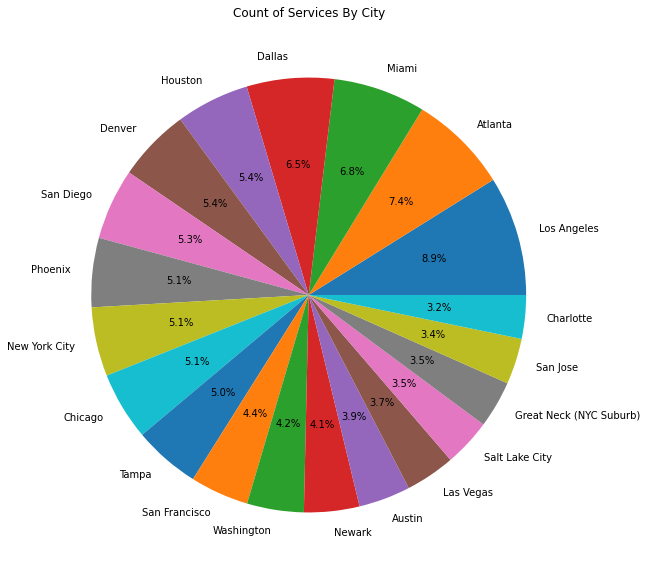

In [10]:
dfLifeStyleCountByZipChart[:20].plot.pie(
    autopct="%.1f%%",
    title="Count of Services By City",
    x="Capital City",
    xlabel="",
    y="Lifestyle Services",
    ylabel="",
    figsize=(10, 10),
)
plt.show()

In [11]:
dfLifeStyleHiresByZipChart = dfLifeStyle.groupby("Capital City")["Hires"].sum().sort_values(ascending=False)

dfLifeStyleHiresByZip = dfLifeStyleHiresByZipChart.to_frame(
    name="Lifestyle Hires"
).reset_index()

dfLifeStyleHiresByZip["Contribution"] = (
    dfLifeStyleHiresByZip["Lifestyle Hires"]
    / dfLifeStyleHiresByZip["Lifestyle Hires"].sum()
)

dfLifeStyleHiresByZip.sort_values(by="Lifestyle Hires", ascending=False)[:20]

,Capital City,Lifestyle Hires,Contribution
0,Los Angeles,"21,144.00",0.05
1,Dallas,"17,968.00",0.04
2,Atlanta,"15,726.00",0.04
3,New York City,"14,937.00",0.03
4,Newark,"14,454.00",0.03
5,Houston,"13,297.00",0.03
6,San Francisco,"13,100.00",0.03
7,Miami,"13,072.00",0.03
8,Phoenix,"11,820.00",0.03
9,San Diego,"11,694.00",0.03


In [12]:
dfLifeStyleHiresRatioByZip = pd.merge(
    dfLifeStyleCountByZip[["Capital City", "Lifestyle Services"]],
    dfLifeStyleHiresByZip[["Capital City", "Lifestyle Hires"]],
    on="Capital City",
    how="left",
)

dfLifeStyleHiresRatioByZip["Hires Ratio"] = (
    dfLifeStyleHiresRatioByZip["Lifestyle Hires"]
    / dfLifeStyleHiresRatioByZip["Lifestyle Services"]
)

In [13]:
dfLifeStyleHiresRatioByZip.sort_values(by="Hires Ratio", ascending=False)[:20]

,Capital City,Lifestyle Services,Lifestyle Hires,Hires Ratio
75,Lincoln,47,"2,611.00",55.55
13,Newark,382,"14,454.00",37.84
53,Lansing,120,"4,238.00",35.32
29,San Antonio,227,"7,781.00",34.28
34,Providence,198,"6,783.00",34.26
66,Manchester,73,"2,440.00",33.42
26,Baltimore,249,"8,316.00",33.40
80,Springfield,40,"1,325.00",33.12
28,Wilmington,232,"7,598.00",32.75
11,San Francisco,405,"13,100.00",32.35


In [14]:
dfLifeStyleHiresRatioByZip.sort_values(by="Hires Ratio", ascending=False)[-20:]

,Capital City,Lifestyle Services,Lifestyle Hires,Hires Ratio
16,Salt Lake City,329,"5,967.00",18.14
22,Boston,287,"4,993.00",17.40
42,Indianapolis,159,"2,739.00",17.23
46,Milwaukee,151,"2,598.00",17.21
20,Nashville,292,"5,007.00",17.15
76,Wichita,46,770.00,16.74
71,Bismarck,57,929.00,16.30
61,Jefferson City,93,"1,484.00",15.96
52,Salem,121,"1,914.00",15.82
87,Fargo,9,139.00,15.44


# Which segments are doing better or worse?

Maybe see implied revenue from these segments

In [15]:
# Get sum of implied revenue by segment
dfRevenuBySegment = (
    df.groupby("Segments")["Implied Revenue"]
    .sum()
    .to_frame(name="Implied Revenue")
    .reset_index()
)
dfRevenuBySegment["Contribution"] = (
    dfRevenuBySegment["Implied Revenue"] / dfRevenuBySegment["Implied Revenue"].sum()
)

# Get sum of implied revenue by services
dfRevenuByServices = (
    df.groupby("Services")["Implied Revenue"]
    .sum()
    .to_frame(name="Implied Revenue")
    .reset_index()
)
dfRevenuByServices["Contribution"] = (
    dfRevenuByServices["Implied Revenue"] / dfRevenuByServices["Implied Revenue"].sum()
)

# Get sum of implied revenue by states
dfRevenuByRevenue = (
    df.groupby("State")["Implied Revenue"]
    .sum()
    .to_frame(name="Implied Revenue")
    .reset_index()
)
dfRevenuByRevenue["Contribution"] = (
    dfRevenuByRevenue["Implied Revenue"] / dfRevenuByRevenue["Implied Revenue"].sum()
)

In [16]:
# See implied revenue by segment
dfRevenuBySegment.sort_values(by="Contribution", ascending=False)

,Segments,Implied Revenue,Contribution
1,Events,"56,338,572.00",0.39
2,Home Improvement,"54,688,414.00",0.38
0,Business,"22,170,825.00",0.15
5,Wellness,"5,299,300.00",0.04
4,Pets,"4,103,751.00",0.03
3,Lessons,"2,834,461.00",0.02


In [17]:
# See top 10 implied revenue by services
dfRevenuByServices.sort_values(by="Contribution", ascending=False)[:9]

,Services,Implied Revenue,Contribution
442,Wedding Officiant,"8,422,000.00",0.06
135,Family Law Attorney,"6,577,850.00",0.05
449,Wedding and Event Photography,"4,959,029.00",0.03
159,Furniture Moving and Heavy Lifting,"4,883,556.00",0.03
87,DJ,"4,422,302.00",0.03
120,Engagement Photography,"4,285,535.00",0.03
304,Portrait Photography,"3,054,229.00",0.02
389,TV Mounting,"2,947,517.00",0.02
277,Personal Bankruptcy Attorney,"2,511,854.00",0.02


In [18]:
# See top 10 implied revenue by zipcode
dfRevenuByRevenue.sort_values(by="Contribution", ascending=False)[:9]

,State,Implied Revenue,Contribution
4,California,"20,677,425.00",0.14
43,Texas,"16,896,629.00",0.12
13,Illinois,"10,828,124.00",0.07
9,Florida,"8,920,918.00",0.06
32,New York,"7,538,284.00",0.05
30,New Jersey,"6,048,770.00",0.04
5,Colorado,"4,935,035.00",0.03
10,Georgia,"4,821,599.00",0.03
8,District of Columbia,"4,790,517.00",0.03


# Is Thumbtack offering this many services because they have a low #hires/#sellers rate?

## Hires by Segment

In [19]:
# See ranking by count
hiresCount = df.groupby("Segments")["Hires"].sum()
dfHiresCount = hiresCount.to_frame(name="Total Hires").reset_index()
dfHiresCount["Contribution"] = (
    dfHiresCount["Total Hires"] / dfHiresCount["Total Hires"].sum()
)
dfHiresCount.sort_values(by="Total Hires", ascending=False)

,Segments,Total Hires,Contribution
2,Home Improvement,"906,861.00",0.61
1,Events,"335,058.00",0.22
0,Business,"113,555.00",0.08
5,Wellness,"57,388.00",0.04
3,Lessons,"47,328.00",0.03
4,Pets,"33,292.00",0.02


### The Hires Ratio

The hires ratio is essentially the percentage of hires over the total number of listing available in that segment/services. This is to see which segment/services gets more customers than others. In other words, it would be a proxy for demand and supply.

In [20]:
# Merge count and hires
dfCountMerge = pd.merge(
    dfSegmentCount[["Segments", "Count"]],
    dfHiresCount[["Segments", "Total Hires"]],
    how="left",
    left_on="Segments",
    right_on="Segments",
)

dfCountMerge["Hire Ratio"] = dfCountMerge["Total Hires"] / dfCountMerge["Count"]
dfCountMerge.sort_values(by="Hire Ratio", ascending=False)

,Segments,Count,Total Hires,Hire Ratio
2,Home Improvement,22213,"906,861.00",40.83
4,Pets,885,"33,292.00",37.62
0,Business,4371,"113,555.00",25.98
1,Events,13027,"335,058.00",25.72
5,Wellness,2655,"57,388.00",21.62
3,Lessons,2362,"47,328.00",20.04


## Hires by Services

Look at the top 20.

In [21]:
# See ranking by count
hiresCountServices = df.groupby("Services")["Hires"].sum()
dfHiresCountServices = hiresCountServices.to_frame(name="Total Hires").reset_index()
dfHiresCountServices["Contribution"] = (
    dfHiresCountServices["Total Hires"] / dfHiresCountServices["Total Hires"].sum()
)

dfHiresCountServices = pd.merge(
    dfHiresCountServices,
    serviceDf[["Segments", "Services"]],
    on="Services",
    how="inner",
).drop_duplicates()

#### Top 20 Hires Count

In [22]:
dfHiresCountServices.sort_values(by="Total Hires", ascending=False)[:19]

,Services,Total Hires,Contribution,Segments
159,Furniture Moving and Heavy Lifting,"53,060.00",0.04,Home Improvement
442,Wedding Officiant,"39,668.00",0.03,Events
389,TV Mounting,"29,285.00",0.02,Home Improvement
225,Junk Removal,"29,263.00",0.02,Home Improvement
69,Commercial Cleaning,"25,479.00",0.02,Home Improvement
239,Local Moving (under 50 miles),"24,234.00",0.02,Home Improvement
87,DJ,"18,594.00",0.01,Events
248,Massage Therapy,"17,913.00",0.01,Wellness
448,Wedding and Event Makeup,"17,023.00",0.01,Events
209,House Cleaning,"16,810.00",0.01,Home Improvement


#### Bottom 20 Hires Count

In [23]:
dfHiresCountServices.sort_values(by="Total Hires", ascending=False)[-19:]

,Services,Total Hires,Contribution,Segments
181,Graphic Design Instruction,179.00,0.00,Lessons
368,Solar Panel Installation and Repair,174.00,0.00,Home Improvement
10,Animal Show Entertainment,153.00,0.00,Events
342,Scrapbooking,149.00,0.00,Events
436,Web Design,137.00,0.00,Business
329,Recruiting,116.00,0.00,Business
30,Baseball Lessons,104.00,0.00,Lessons
218,Intellectual Property Attorney,96.00,0.00,Business
305,Powder Coating,95.00,0.00,Home Improvement
2,Above Ground Swimming Pool Installation,81.00,0.00,Home Improvement


### The Hires Ratio

In [24]:
# Merge count and hires
dfCountMergeServices = pd.merge(
    dfServicesCount[["Services", "Count"]],
    dfHiresCountServices[["Services", "Total Hires"]],
    how="left",
    left_on="Services",
    right_on="Services",
)

dfCountMergeServices["Hire Ratio"] = (
    dfCountMergeServices["Total Hires"] / dfCountMergeServices["Count"]
)

dfCountMergeServices = pd.merge(
    dfCountMergeServices.drop_duplicates(),
    serviceDf[["Segments", "Services"]].drop_duplicates(),
    on="Services",
    how="inner",
).drop_duplicates()

dfCountMergeServices = dfCountMergeServices[
    ~dfCountMergeServices.duplicated("Services", keep="first")
]

#### Top 20 Hires Ratio

In [25]:
dfCountMergeServices.sort_values(by="Hire Ratio", ascending=False)[:19]

,Services,Count,Total Hires,Hire Ratio,Segments
292,Piano Moving,45,"10,371.00",230.47,Home Improvement
331,Resume Writing,55,"10,554.00",191.89,Business
159,Furniture Moving and Heavy Lifting,377,"53,060.00",140.74,Home Improvement
300,Pool Table Moving,30,"4,176.00",139.20,Home Improvement
14,Appliance Repair or Maintenance,83,"10,550.00",127.11,Home Improvement
413,Upholstery and Furniture Cleaning,71,"8,738.00",123.07,Home Improvement
172,Gazebo Installation and Construction,36,"4,409.00",122.47,Home Improvement
53,Carpet Repair or Partial Replacement,43,"5,193.00",120.77,Home Improvement
242,Long Distance Moving,93,"10,918.00",117.40,Home Improvement
130,Exercise Equipment Repair,29,"3,388.00",116.83,Business


#### Bottom 20 Hires Ratio

In [26]:
dfCountMergeServices.sort_values(by="Hire Ratio", ascending=False)[-19:]

,Services,Count,Total Hires,Hire Ratio,Segments
421,Violin Lessons,259,"1,698.00",6.56,Lessons
311,Private Self Defense Lessons,200,"1,264.00",6.32,Lessons
310,Private Pilates Instruction,88,548.00,6.23,Wellness
133,Facial Treatments,126,784.00,6.22,Wellness
76,Construction Services,72,440.00,6.11,Home Improvement
55,Cello Lessons,47,281.00,5.98,Lessons
30,Baseball Lessons,18,104.00,5.78,Lessons
337,Room Remodel,41,236.00,5.76,Home Improvement
254,Motivational Speaking,385,"2,127.00",5.52,Events
181,Graphic Design Instruction,35,179.00,5.11,Lessons


### Scatter of Count and Number of Hires

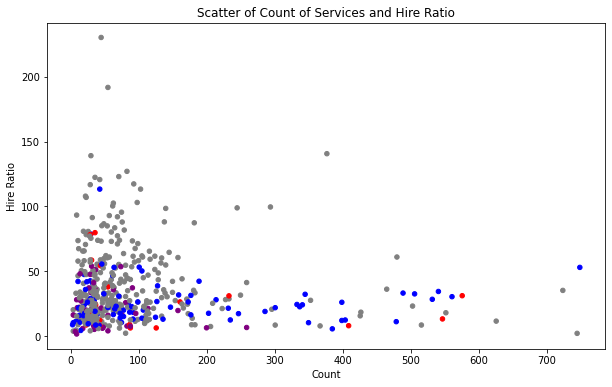

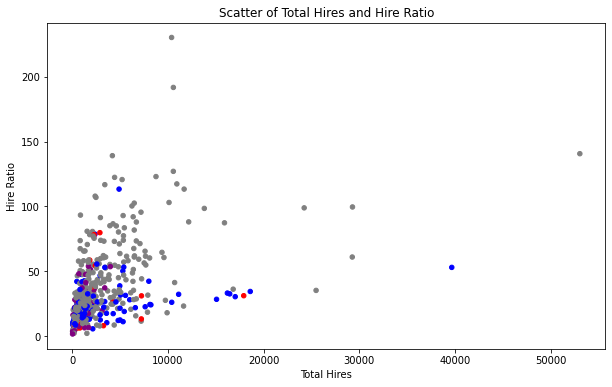

In [27]:
colors = {
    "Home Improvement": "gray",
    "Business": "gray",
    "Pets": "gray",
    "Events": "blue",
    "Wellness": "red",
    "Lessons": "purple",
}

dfCountMergeServices.plot.scatter(
    title="Scatter of Count of Services and Hire Ratio",
    x="Count",
    y="Hire Ratio",
    figsize=(10, 6),
    c=dfCountMergeServices["Segments"].map(colors),
)
plt.show()

dfCountMergeServices.plot.scatter(
    title="Scatter of Total Hires and Hire Ratio",
    x="Total Hires",
    y="Hire Ratio",
    figsize=(10, 6),
    c=dfCountMergeServices["Segments"].map(colors),
)
plt.show()

From the first scatterplot, it could mean that services with a higher count could mean that there is no clear indication of specialization. It could be that:
- There are too many services for customers to choose from, confusing them
- There are just a lot of competitors, so the sellers would have to share more

# Are there any segments or services that showcase more uncaptured potential?

# What types of sellers are the most successful? Individuals or business? Does it depend on the type of service and/or region?

# Top 10 Weight

In [28]:
hiresTopN = (
    df.groupby("Services")["Hires"]
    .nlargest(10)
    .sum(level=0)
    .to_frame(name="Top Hires")
    .reset_index()
)

hireSkew = (
    df.groupby("Services")["Hires"].skew().to_frame(name="Skewness").reset_index()
)

dfHiresSkew = pd.merge(
    dfHiresCountServices[["Services", "Total Hires", "Segments"]],
    hiresTopN,
    on="Services",
)

dfHiresSkew = pd.merge(
    dfHiresSkew, dfServicesCount[["Services", "Count"]], on="Services"
)

dfHiresSkew = pd.merge(dfHiresSkew, hireSkew, on="Services")

dfHiresSkew["Top Weight"] = dfHiresSkew["Top Hires"] / dfHiresSkew["Total Hires"]
dfHiresSkew = dfHiresSkew[
    [
        "Segments",
        "Services",
        "Count",
        "Top Hires",
        "Total Hires",
        "Top Weight",
        "Skewness",
    ]
]
dfHiresSkew[
    (dfHiresSkew["Count"] > 100)
    & (
        (dfHiresSkew["Segments"] == "Events")
        | (dfHiresSkew["Segments"] == "Lessons")
        | (dfHiresSkew["Segments"] == "Wellness")
    )
].sort_values(by="Top Weight", ascending=False)[:20]

,Segments,Services,Count,Top Hires,Total Hires,Top Weight,Skewness
303,Events,Portrait Artistry,107,"1,510.00","2,142.00",0.70,8.00
33,Lessons,Bass Guitar Lessons,114,"1,598.00","2,423.00",0.66,6.82
133,Wellness,Facial Treatments,126,504.00,784.00,0.64,3.41
374,Events,Sports Photography,136,"1,094.00","1,767.00",0.62,2.50
370,Events,Songwriting,177,"1,687.00","2,886.00",0.58,4.30
243,Events,MC and Host Services,127,"1,936.00","3,378.00",0.57,2.76
254,Events,Motivational Speaking,385,"1,209.00","2,127.00",0.57,6.72
273,Events,Pastry Chef and Cake Making Services,105,777.00,"1,444.00",0.54,2.59
128,Events,Event Security & Bouncer Services,125,970.00,"1,810.00",0.54,4.15
79,Events,Costumed Character Entertainment,105,"2,781.00","5,271.00",0.53,2.31


In [29]:
df[df["Services"] == "Saxophone Lessons"].sort_values(
    by="Hires", ascending=False
)[:10]

,Segments,Services,Type,Service,Hires,Price,Price Type,Rating,Zip Code,Capital City,State,Abbreviation,Implied Revenue
3535,Lessons,Saxophone Lessons,Peripheral,Nashville Music Academy,90.00,60.00,hour,5.00,37219,Nashville,Tennessee,TN,"5,400.00"
74222,Lessons,Saxophone Lessons,Peripheral,Musik Mogul,84.00,50.00,hour,5.00,33132,Miami,Florida,FL,"4,200.00"
42421,Lessons,Saxophone Lessons,Peripheral,Continuo Piano Tuning,76.00,80.00,hour,5.00,11021,Great Neck (NYC Suburb),New York,NY,"6,080.00"
150897,Lessons,Saxophone Lessons,Peripheral,Thomas Kresge Music,48.00,60.00,hour,5.00,10007,New York City,New York,NY,"2,880.00"
150894,Lessons,Saxophone Lessons,Peripheral,Joshua Shneider Music/NYC,38.00,70.00,hour,5.00,10007,New York City,New York,NY,"2,660.00"
216682,Lessons,Saxophone Lessons,Peripheral,Andrew Dixon Music Education/Performance,30.00,60.00,hour,5.00,94108,San Francisco,California,CA,"1,800.00"
3534,Lessons,Saxophone Lessons,Peripheral,DPV Music Lessons,29.00,79.00,hour,5.00,37219,Nashville,Tennessee,TN,"2,291.00"
109824,Lessons,Saxophone Lessons,Peripheral,Lessons by Bond,27.00,50.00,hour,5.00,90013,Los Angeles,California,CA,"1,350.00"
69971,Lessons,Saxophone Lessons,Peripheral,Michael Abresch,25.00,45.00,hour,5.00,55102,St. Paul,Minnesota,MN,"1,125.00"
150889,Lessons,Saxophone Lessons,Peripheral,Michael McGarril,24.00,80.00,hour,5.00,10007,New York City,New York,NY,"1,920.00"
